<a href="https://colab.research.google.com/github/Ehsanahmadi1400/BehavioralCloning/blob/main/BehavioralCloning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Behavioral Clonning

In [ ]:
import os
import cv2
import random
import ntpath
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from imgaug import augmenters as iaa

In [ ]:
from sklearn.utils import shuffle
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Convolution2D

In [ ]:
datadir = 'track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv('car_data-main\driving_log.csv', names = columns)
pd.set_option('display.max_colwidth', None)
data.head()

center  \
0  C:\Users\Home\Desktop\IMG\center_2021_09_10_15_21_05_170.jpg   
1  C:\Users\Home\Desktop\IMG\center_2021_09_10_15_21_05_249.jpg   
2  C:\Users\Home\Desktop\IMG\center_2021_09_10_15_21_05_330.jpg   
3  C:\Users\Home\Desktop\IMG\center_2021_09_10_15_21_05_407.jpg   
4  C:\Users\Home\Desktop\IMG\center_2021_09_10_15_21_05_489.jpg   

                                                         left  \
0  C:\Users\Home\Desktop\IMG\left_2021_09_10_15_21_05_170.jpg   
1  C:\Users\Home\Desktop\IMG\left_2021_09_10_15_21_05_249.jpg   
2  C:\Users\Home\Desktop\IMG\left_2021_09_10_15_21_05_330.jpg   
3  C:\Users\Home\Desktop\IMG\left_2021_09_10_15_21_05_407.jpg   
4  C:\Users\Home\Desktop\IMG\left_2021_09_10_15_21_05_489.jpg   

                                                         right  steering  \
0  C:\Users\Home\Desktop\IMG\right_2021_09_10_15_21_05_170.jpg       0.0   
1  C:\Users\Home\Desktop\IMG\right_2021_09_10_15_21_05_249.jpg       0.0   
2  C:\Users\Home\Desktop\IMG\right_2021_09_10_15_21_05_330.jpg       0.0   
3  C:\Users\Home\Desktop\IMG\right_2021_09_10_15_21_05_407.jpg       0.0   
4  C:\Users\Home\Desktop\IMG\right_2021_09_10_15_21_05_489.jpg       0.0   

   throttle  reverse     speed  
0       0.0        0  25.00800  
1       0.0        0  24.80692  
2       0.0        0  24.60746  
3       0.0        0  24.40961  
4       0.0        0  24.21335

In [ ]:
def path_leaf(path):
    head, tail =ntpath.split(path)
    return tail

In [ ]:
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)

In [ ]:
data.head()

center                              left  \
0  center_2021_09_10_15_21_05_170.jpg  left_2021_09_10_15_21_05_170.jpg   
1  center_2021_09_10_15_21_05_249.jpg  left_2021_09_10_15_21_05_249.jpg   
2  center_2021_09_10_15_21_05_330.jpg  left_2021_09_10_15_21_05_330.jpg   
3  center_2021_09_10_15_21_05_407.jpg  left_2021_09_10_15_21_05_407.jpg   
4  center_2021_09_10_15_21_05_489.jpg  left_2021_09_10_15_21_05_489.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2021_09_10_15_21_05_170.jpg       0.0       0.0        0  25.00800  
1  right_2021_09_10_15_21_05_249.jpg       0.0       0.0        0  24.80692  
2  right_2021_09_10_15_21_05_330.jpg       0.0       0.0        0  24.60746  
3  right_2021_09_10_15_21_05_407.jpg       0.0       0.0        0  24.40961  
4  right_2021_09_10_15_21_05_489.jpg       0.0       0.0        0  24.21335

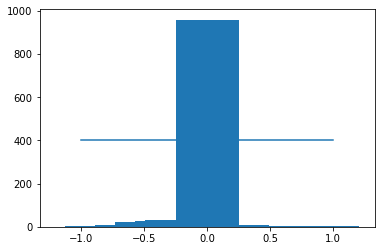

In [ ]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5 # how come the center?
plt.bar(center, hist, width= 0.5)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))
plt.show()

In [ ]:
print('total data:', len(data))

total data: 1173


In [ ]:
len(data['steering'])

1173

In [ ]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]: # how come this condition is used?
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)

In [ ]:
len(remove_list)

558

In [ ]:
print('removed:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

removed: 558
remaining: 615


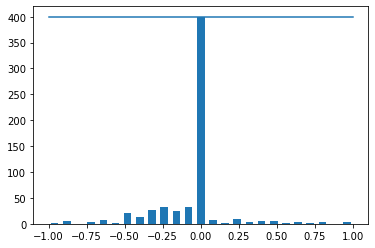

In [ ]:
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

In [ ]:
print(data.iloc[1])
def load_img_steering(datadir, df):
  image_path = []
  steering = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
    image_path.append(os.path.join(datadir, center.strip()))
    steering.append(float(indexed_data[3]))
    # left image append
    image_path.append(os.path.join(datadir,left.strip()))
    steering.append(float(indexed_data[3])+0.15)
    # right image append
    image_path.append(os.path.join(datadir,right.strip()))
    steering.append(float(indexed_data[3])-0.15)
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  return image_paths, steerings

center      center_2021_09_10_15_21_05_489.jpg
left          left_2021_09_10_15_21_05_489.jpg
right        right_2021_09_10_15_21_05_489.jpg
steering                                   0.0
throttle                                   0.0
reverse                                      0
speed                                 24.21335
Name: 4, dtype: object


In [ ]:
image_paths, steerings = load_img_steering('car_data-main\IMG', data)

In [ ]:
image_paths[3]

'car_data-main\\IMG\\center_2021_09_10_15_21_05_489.jpg'

In [ ]:
steerings[:6]

array([ 0.  ,  0.15, -0.15,  0.  ,  0.15, -0.15])

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

Training Samples: 1476
Valid Samples: 369


Text(0.5, 1.0, 'Validation set')

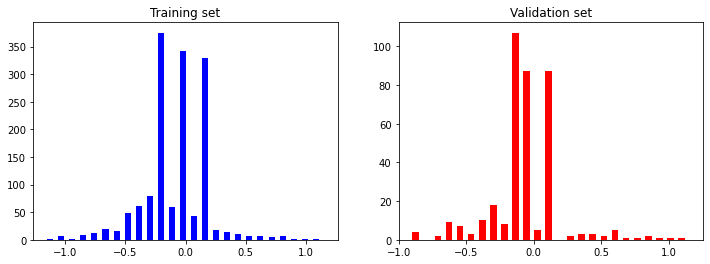

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [ ]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image

Text(0.5, 1.0, 'Zoomed Image')

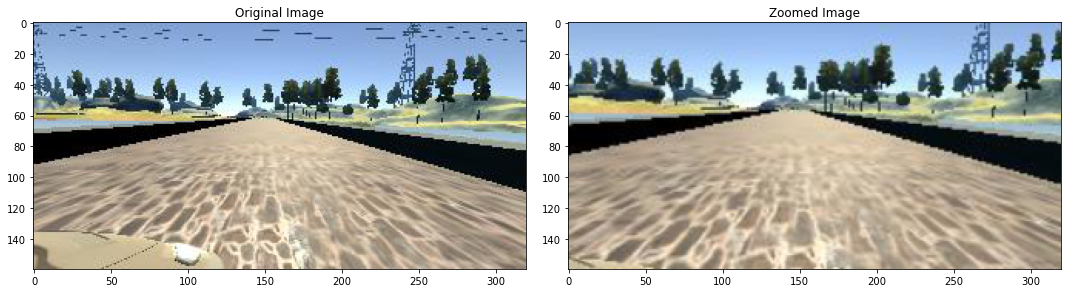

In [ ]:
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')



Text(0.5, 1.0, 'Panned Image')

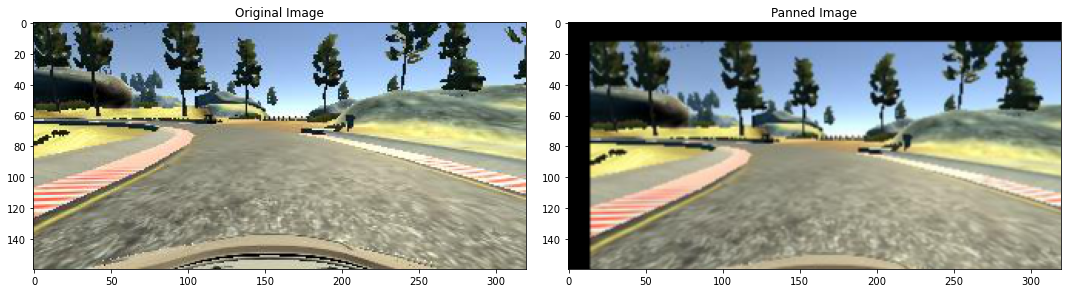

In [ ]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

Text(0.5, 1.0, 'Brightness altered image ')

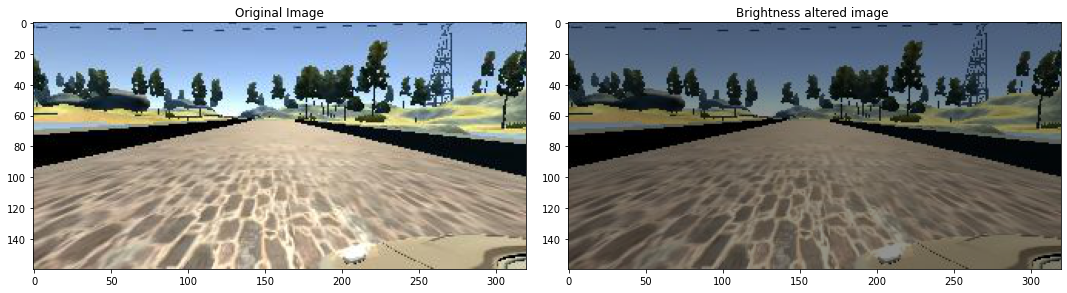

In [ ]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

Text(0.5, 1.0, 'Flipped Image - Steering Angle:0.19999999999999998')

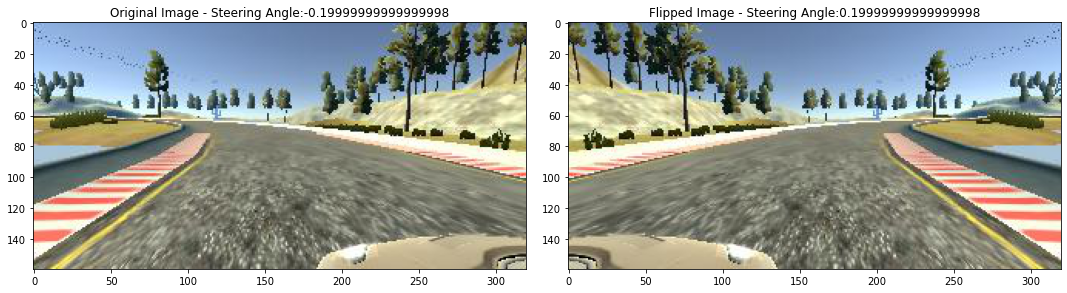

In [ ]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]


original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [ ]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)

    return image, steering_angle

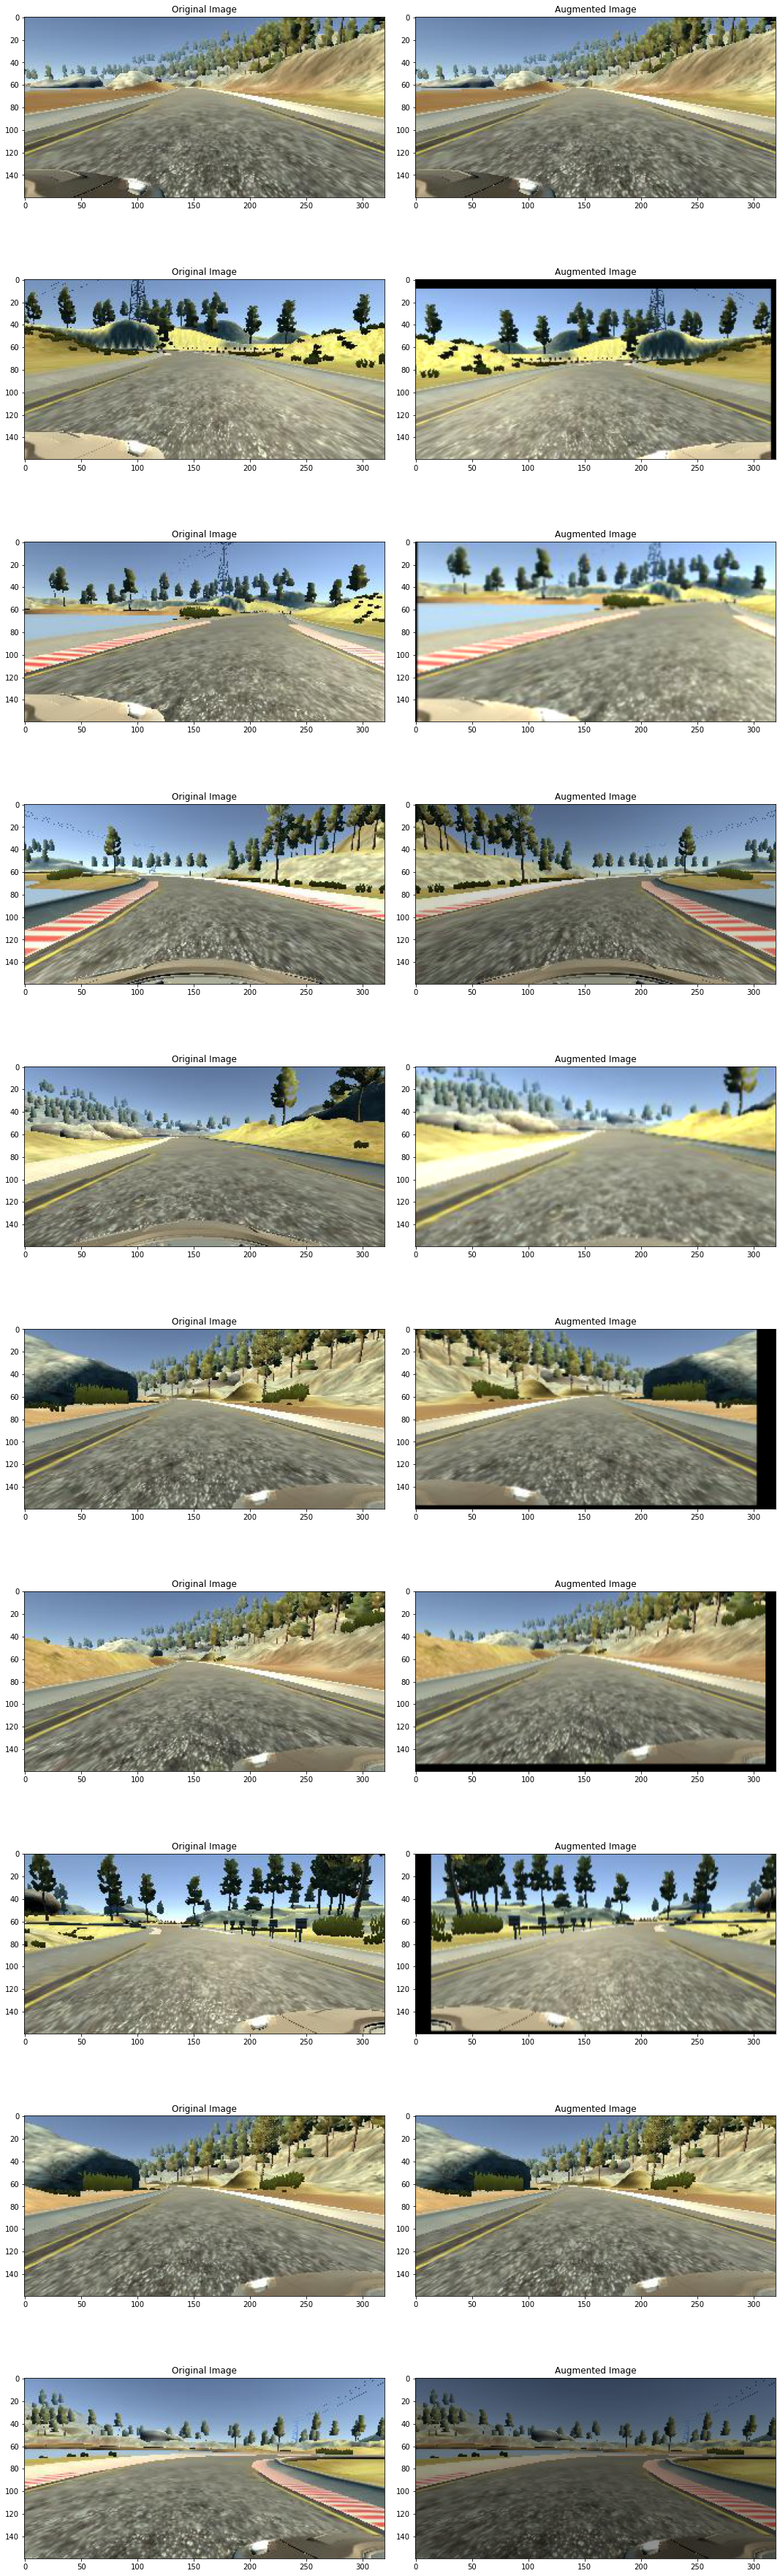

In [ ]:
ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]

  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")

  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

In [ ]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img

Text(0.5, 1.0, 'Preprocessed Image')

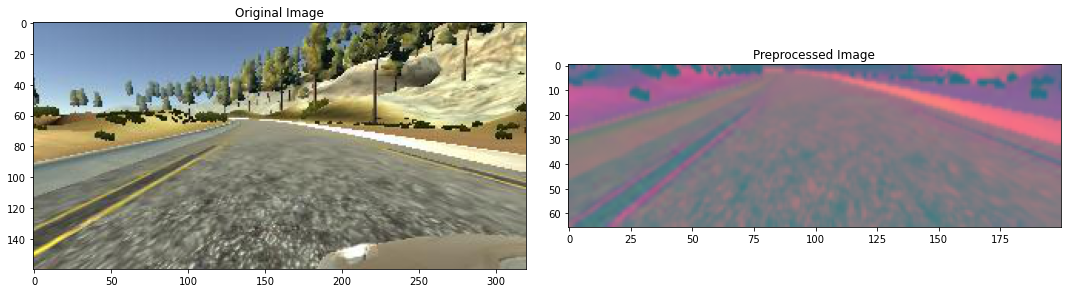

In [ ]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [ ]:
def batch_generator(image_paths, steering_ang, batch_size, istraining): # istraining, it will be used by model.fit function

  while True:
    batch_img = []
    batch_steering = []

    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)

      if istraining:
        im, steering = random_augment(image_paths[random_index], steering_ang[random_index])

      else:
        im = mpimg.imread(image_paths[random_index])
        steering = steering_ang[random_index]

      im = img_preprocess(im)
      batch_img.append(im)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))


Text(0.5, 1.0, 'Validation Image')

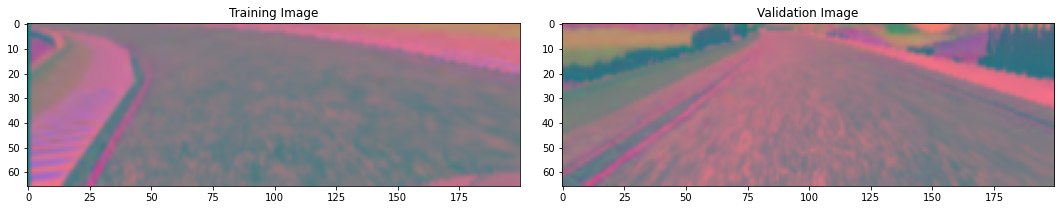

In [ ]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))
# next function receives next data from subroutine(yield)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

#### elu is used instead of relu
#### mse is used as loss status, because we have a regression data needed in output : steering data from -1 to 1

In [ ]:
def nvidia_model():
  model = Sequential()
  model.add(Convolution2D(24, (5, 5), input_shape=(66, 200, 3), activation='elu'))
#   model.add(Convolution2D(36, (5, 5), activation='elu'))
#   model.add(Convolution2D(48, (5, 5), activation='elu'))
#   model.add(Convolution2D(64, (3, 3), activation='elu'))
  model.add(Convolution2D(64, (3, 3), activation='elu'))
#   model.add(Dropout(0.5))


  model.add(Flatten())

  model.add(Dense(100, activation = 'elu'))
#   model.add(Dropout(0.5))

#   model.add(Dense(50, activation = 'elu'))
#   model.add(Dropout(0.5))

#   model.add(Dense(10, activation = 'elu'))
#   model.add(Dropout(0.5))

  model.add(Dense(1))

  optimizer = Adam(learning_rate=1e-3)
  model.compile(loss='mse', optimizer=optimizer)
  return model
model = nvidia_model()
print(model.summary())

In [ ]:
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),
                                  steps_per_epoch=300,
                                  epochs=10,
                                  validation_data=batch_generator(X_valid, y_valid, 100, 0),
                                  validation_steps=200,
                                  verbose=1,
                                  shuffle = 1)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [ ]:
model.save('model.h5')

In [ ]:
# This is to save your model from google colab
from google.colab import files
files.download('model.h5')